### Problem Statement:

#### Refer social network Ad Dataset. Apply appropriate EDA methods wherever required and perform feature engineering. Construct a model using KNN classifier. Analyse the performance of model with suitable evaluation measures and generate classification report.


### Importing libraries

In [1]:
import numpy as nm
import pandas as pd


from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix

import warnings
warnings.filterwarnings("ignore")

### Load dataset

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


### Data Description

In [3]:
print(df.shape)
print('\n')
print(df.describe())
print('\n')
print(df.info())

(400, 5)


            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), o

### Checking Missing Values

In [4]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

No Missing Values

### EDA

#### Countplot Of Purchased Cloumn

In [5]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

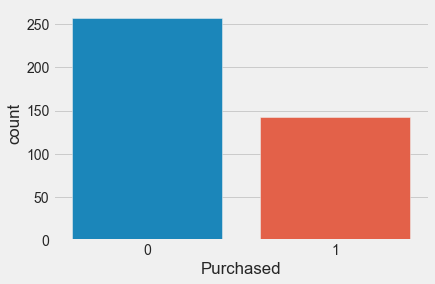

In [6]:
sns.countplot(x = 'Purchased', data = df);

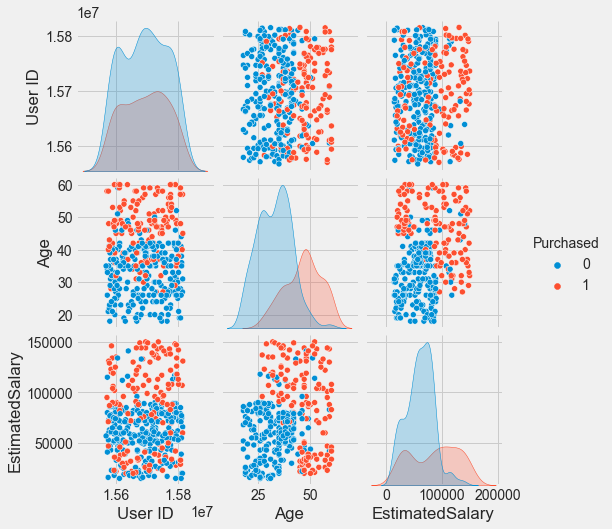

In [7]:
sns.pairplot(data = df, hue = 'Purchased');

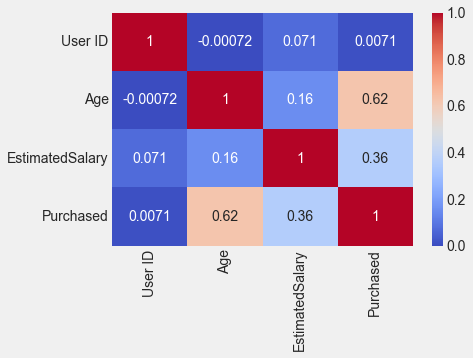

In [8]:
corr = df.corr()
sns.heatmap(corr, cmap = 'coolwarm', annot = True);

Age,Estimated Salary are highly correlated with Purchased (response variable).

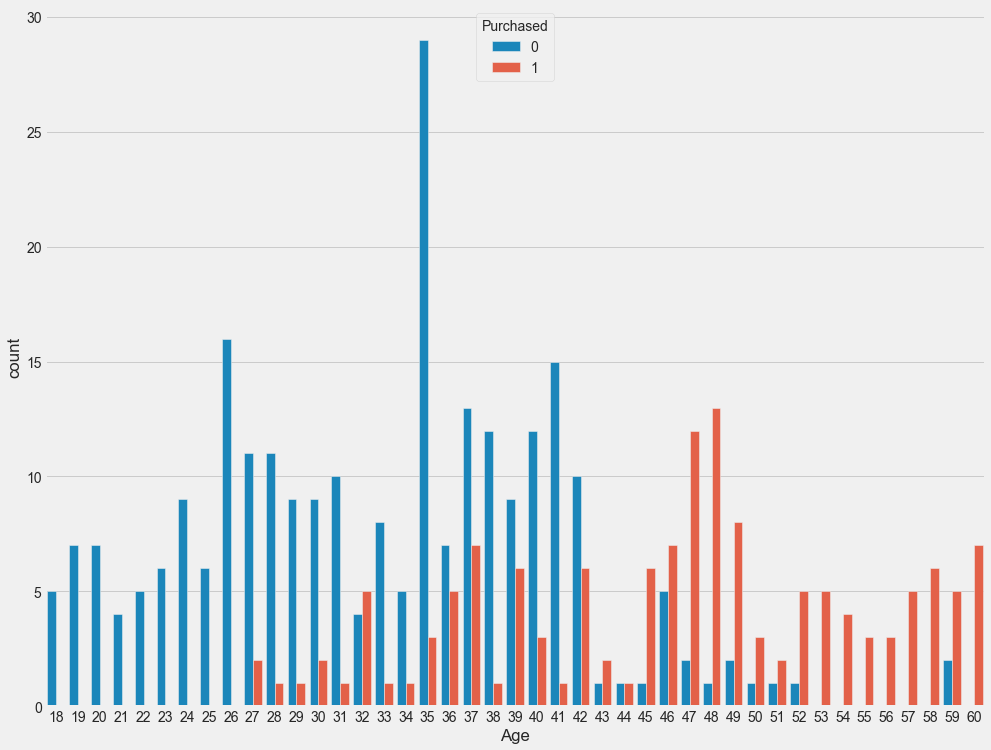

In [9]:
fig,ax = plt.subplots(figsize=(15,12))
sns.countplot(x ='Age',hue = 'Purchased', data = df,ax=ax);

User Between the age group 18-46 doesn't seem to be not purchased and Use rbetween the age group 46-6 mostly purchased.

### Model Building

#### Splitting the dataset

In [10]:
#Extracting Independent and dependent Variable 
x = df.iloc[:, [2, 3]].values  #age, estimatedSalary
y = df.iloc[:, 4].values     #Purchased

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [12]:
# Feature Scaling  
from sklearn.preprocessing import StandardScaler    
st= StandardScaler()    
X_train= st.fit_transform(X_train)    
X_test= st.transform(X_test)  

In [13]:
print('Number of Data points in train data:',X_train.shape)
print('Number of Data points in test data:',Y_test.shape)

Number of Data points in train data: (280, 2)
Number of Data points in test data: (120,)


#### Fitting of k-NN classifier to train data

In [14]:
from sklearn.neighbors import KNeighborsClassifier 

In [16]:
# Create a KNN classifier object
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier

KNeighborsClassifier()

In [17]:
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

#### Predicting the Test Result

In [18]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

#### Evaluate the performance of the KNN classifier model

In [20]:
# Evaluate the performance of the KNN classifier model
print('Accuracy:', accuracy_score(Y_test, y_pred))
print('Precision:', precision_score(Y_test, y_pred))
print('Recall:', recall_score(Y_test, y_pred))
print('F1-score:', f1_score(Y_test, y_pred))

Accuracy: 0.9166666666666666
Precision: 0.8604651162790697
Recall: 0.9024390243902439
F1-score: 0.8809523809523809


#### Creating the Confusion Matrix,Classification Report

In [21]:
cm= confusion_matrix(Y_test, y_pred)  
print('Confusion Matrix:\n',cm)
print('\n')
print('Classification Report:\n',classification_report(Y_test,y_pred))

Confusion Matrix:
 [[73  6]
 [ 4 37]]


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94        79
           1       0.86      0.90      0.88        41

    accuracy                           0.92       120
   macro avg       0.90      0.91      0.91       120
weighted avg       0.92      0.92      0.92       120



So from Above confusion matrix and classification report we can say that our model give good result on testing datasets with accuracy of 92%.

So KNN classifier is suitable for our datasets.